<a href="https://colab.research.google.com/github/pySin/PytorchTutorial/blob/main/SimpleNeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [21]:
# Create a Model Class that inherits nn.Module
class Model(nn.Module):
  # Input layer (4 features of the flower) --> Hidden layer 1
  # (Number of neurons) --> H2 (n) -->
  # output (3 classes of Iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__()  # instantiate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)  # fc1 is Fully Connected
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x))  # Rectified Linear Unit - if result is less then 0 call it Zero
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [22]:
# Pick a manual seed for randomization
torch.manual_seed(41)
# Create an instance of the model
model = Model()

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
# Loading data through URL
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)

In [6]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
# Get only the first 5 records
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [8]:
# Get the last 5 records
my_df.tail()

,sepal.length,sepal.width,petal.length,petal.width,variety
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica
149,5.9,3.0,5.1,1.8,Virginica


In [25]:
# Replace last column strings with integers
my_df["variety"] = my_df["variety"].replace("Setosa", 0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor", 1.0)
my_df["variety"] = my_df["variety"].replace("Virginica", 2.0)
my_df

<ipython-input-25-2b3665cd8e67>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df["variety"] = my_df["variety"].replace("Virginica", 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [27]:
# Train Test and split. Set X and Y.
X = my_df.drop("variety", axis=1)  # Features
y = my_df["variety"]  # Outcomes

In [28]:
# Convert to numpy arrays
X = X.values
y = y.values

In [12]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [29]:
# Import SciKit lern
from sklearn.model_selection import train_test_split

In [30]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)  # Testing size would be 20%

In [31]:
# Convert X features to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [32]:
# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [33]:
# State the criterion of model to measure the error, how far off the predictions are from the data
criterion = nn.CrossEntropyLoss()
# Choose Adam Optimizer, lr = Learning Rate (if error doesn't go down after a bunch of iterations (epochs) lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)


In [17]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)>

In [35]:
# Train our model!
# Epochs? (one run thru all the trsaining data in our network)
epochs = 100
losses = []
for i in range(epochs):
  # Go forward and get a prediction
  y_pred = model.forward(X_train)  # Get predicted results

  # Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train)  # predicted value VS the y_train value

  # Keep track of our losses
  losses.append(loss.detach().numpy())

  # Print every 10 epoch
  if i % 10 == 0:
    print(f"Epoch: {i} and loss: {loss}")

  # Do some back propagation: take the error rate of forward propagation and
  # feed it back thru the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162347674369812
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003389775753021
Epoch: 50 and loss: 0.26794716715812683
Epoch: 60 and loss: 0.1796349585056305
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651507973671
Epoch: 90 and loss: 0.06522614508867264


Text(0.5, 0, 'Epoch')

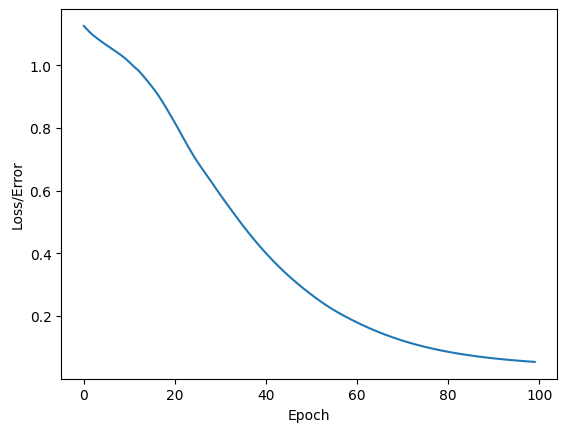

In [36]:
# Make a graph
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")

In [46]:
# Evaluate model on test data set
with torch.no_grad():  # Basically turn off Back propagation
  y_eval = model.forward(X_test)  # X_test are features from our test set, y_eval will be predictions
  loss = criterion(y_eval, y_test)  # Find the loss or error
  print(f"Check how torch_no_grad() is looped over {y_eval}!!")

Check how torch_no_grad() is looped over tensor([[-5.8771,  4.4629,  6.5155],
        [-7.5451,  4.1668,  9.7293],
        [-8.4517,  5.1275, 10.2015],
        [-4.3411,  5.6280,  2.5636],
        [-7.1838,  4.8757,  8.3024],
        [-3.3940,  5.3421,  1.2802],
        [-5.9240,  4.9826,  6.0025],
        [-4.2895,  5.7016,  2.3920],
        [-6.5369,  4.9261,  7.1291],
        [-8.0526,  4.4129, 10.3325],
        [-5.6775,  4.9505,  5.6248],
        [ 4.5748, -2.2579, -2.8925],
        [ 4.2646, -2.0055, -2.7342],
        [-2.1081,  4.0482,  0.5803],
        [ 3.4608, -1.2147, -2.3488],
        [-5.4739,  5.1174,  5.0966],
        [ 4.0637, -1.8045, -2.6504],
        [-5.8090,  4.6057,  6.2494],
        [ 4.9250, -2.5763, -3.0545],
        [ 3.4559, -1.2559, -2.3637],
        [-2.6161,  4.5584,  0.8575],
        [-7.7427,  4.7379,  9.4233],
        [ 3.5776, -1.3269, -2.4109],
        [ 4.5445, -2.2478, -2.8698],
        [-2.6548,  4.6138,  0.8825],
        [-3.2832,  5.2189,  1.2163

In [38]:
loss

tensor(0.1315)

In [44]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Satose"
    elif y_test[i] == 1:
      x = "Versicolor"
    else:
      x = "Virginica"

    # What type of flower the network thinks it is
    print(f"{i+1}.) {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f"We got {correct} correct!")

1.) tensor([-5.8771,  4.4629,  6.5155]) 	 2 	 2
2.) tensor([-7.5451,  4.1668,  9.7293]) 	 2 	 2
3.) tensor([-8.4517,  5.1275, 10.2015]) 	 2 	 2
4.) tensor([-4.3411,  5.6280,  2.5636]) 	 1 	 1
5.) tensor([-7.1838,  4.8757,  8.3023]) 	 2 	 2
6.) tensor([-3.3940,  5.3421,  1.2802]) 	 1 	 1
7.) tensor([-5.9240,  4.9826,  6.0025]) 	 2 	 2
8.) tensor([-4.2895,  5.7016,  2.3920]) 	 1 	 1
9.) tensor([-6.5369,  4.9261,  7.1291]) 	 2 	 2
10.) tensor([-8.0526,  4.4129, 10.3325]) 	 2 	 2
11.) tensor([-5.6775,  4.9505,  5.6248]) 	 2 	 2
12.) tensor([ 4.5748, -2.2579, -2.8925]) 	 0 	 0
13.) tensor([ 4.2646, -2.0055, -2.7342]) 	 0 	 0
14.) tensor([-2.1081,  4.0482,  0.5803]) 	 1 	 1
15.) tensor([ 3.4608, -1.2147, -2.3488]) 	 0 	 0
16.) tensor([-5.4739,  5.1174,  5.0966]) 	 2 	 1
17.) tensor([ 4.0637, -1.8045, -2.6504]) 	 0 	 0
18.) tensor([-5.8090,  4.6057,  6.2494]) 	 1 	 2
19.) tensor([ 4.9250, -2.5763, -3.0545]) 	 0 	 0
20.) tensor([ 3.4559, -1.2559, -2.3637]) 	 0 	 0
21.) tensor([-2.6161,  4.5584